## **Problem Statement**
Saudi Aramco is one of the largest publicly traded companies, and its stock price is influenced by various factors such as market trends, oil prices, economic policies, and investor sentiment. Predicting stock prices accurately is crucial for investors, financial analysts, and stakeholders to make informed decisions. However, stock prices are highly volatile, making accurate prediction a complex challenge.

This project aims to develop a machine learning model to forecast Saudi Aramco’s stock closing prices based on historical data and various technical indicators. The goal is to identify meaningful patterns and trends that can help predict future stock prices, improving investment strategies.

## **Project Goals & Objectives**
**1 - Analyze Stock Price Trends**
- Examine historical Saudi Aramco stock data to identify key patterns.
- Study the impact of trading volume, market trends, and technical indicators on stock prices.

**2 - Build a Predictive Regression**
- Use AI and statistical regression techniques to forecast future stock prices.
- Train the model on historical data to improve prediction accuracy.

**3 - Support Data-Driven Investment Decisions**
- Provide investors and analysts with insights to make informed decisions.
- Reduce uncertainty by predicting potential stock price movements.

**4 - Ensure Model Accuracy & Reliability**
- Validate the model using real-world data and key performance metrics.
- Measure accuracy using RMSE, MAE, and R² scores.

**5 - Make Predictions Accessible & Understandable**
- Visualize predictions using charts, graphs, and trend reports.
- Optionally, develop a simple dashboard for interactive forecasting.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pickle as pkl
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

#### Loading the dataset

In [4]:
df = pd.read_csv('aramco_stock_price_dataset.csv', encoding='utf-8')

## Data Understanding & Intitial EDA

In [5]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_diff,Lag_Close,...,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Change_Close,Change_Volume,Weekday,Month,Year,Quarter,Volume_Normalized
0,2019-12-11 00:00:00+03:00,25.485229,25.485229,25.485229,25.485229,38289394,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,12,2019,4,1.580604
1,2019-12-12 00:00:00+03:00,28.019275,28.019275,26.064442,26.643652,505692621,0.0,0.0,1.158422,25.485229,...,NaN,NaN,NaN,1.158422,467403227.0,3,12,2019,4,27.146985
2,2019-12-15 00:00:00+03:00,26.860858,27.150462,26.643654,27.078060,98349281,0.0,0.0,0.434408,26.643652,...,NaN,NaN,NaN,0.434408,-407343340.0,6,12,2019,4,4.865806


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1095 non-null   object 
 1   Open               1095 non-null   float64
 2   High               1095 non-null   float64
 3   Low                1095 non-null   float64
 4   Close              1095 non-null   float64
 5   Volume             1095 non-null   int64  
 6   Dividends          1095 non-null   float64
 7   Stock Splits       1095 non-null   float64
 8   Close_diff         1094 non-null   float64
 9   Lag_Close          1094 non-null   float64
 10  Lag_High           1094 non-null   float64
 11  Lag_Low            1094 non-null   float64
 12  Rolling_Mean_7     1089 non-null   float64
 13  Rolling_Std_7      1089 non-null   float64
 14  Rolling_Mean_30    1066 non-null   float64
 15  Rolling_Std_30     1066 non-null   float64
 16  RSI                1082 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1095.0,2.885776e+01,3.472621e+00,1.954834e+01,2.654623e+01,2.843185e+01,3.184231e+01,3.641110e+01
High,1095.0,2.903354e+01,3.503517e+00,2.048955e+01,2.665929e+01,2.856368e+01,3.203948e+01,3.713932e+01
Low,1095.0,2.867893e+01,3.421617e+00,1.954834e+01,2.643623e+01,2.821213e+01,3.169444e+01,3.615408e+01
Close,1095.0,2.886365e+01,3.458323e+00,2.012754e+01,2.654817e+01,2.847579e+01,3.184231e+01,3.641110e+01
Volume,1095.0,9.392873e+06,1.829030e+07,0.000000e+00,3.777274e+06,6.202220e+06,1.108638e+07,5.056926e+08
Dividends,1095.0,3.695110e-03,3.158860e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.024000e-01
Stock Splits,1095.0,4.018265e-03,6.639255e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+00
Close_diff,1094.0,4.081144e-03,3.196540e-01,-2.172035e+00,-1.134429e-01,0.000000e+00,1.157408e-01,2.027229e+00
Lag_Close,1094.0,2.886265e+01,3.459748e+00,2.012754e+01,2.654735e+01,2.847579e+01,3.184231e+01,3.641110e+01
Lag_High,1094.0,2.903257e+01,3.504971e+00,2.048955e+01,2.665837e+01,2.855394e+01,3.203948e+01,3.713932e+01


In [8]:
df.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Dividends             0
Stock Splits          0
Close_diff            1
Lag_Close             1
Lag_High              1
Lag_Low               1
Rolling_Mean_7        6
Rolling_Std_7         6
Rolling_Mean_30      29
Rolling_Std_30       29
RSI                  13
MACD                  0
BB_Middle_Band       19
BB_Upper_Band        19
BB_Lower_Band        19
Change_Close          1
Change_Volume         1
Weekday               0
Month                 0
Year                  0
Quarter               0
Volume_Normalized     0
dtype: int64

In [9]:
df.shape

(1095, 28)

In [10]:
df.dtypes

Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                 int64
Dividends            float64
Stock Splits         float64
Close_diff           float64
Lag_Close            float64
Lag_High             float64
Lag_Low              float64
Rolling_Mean_7       float64
Rolling_Std_7        float64
Rolling_Mean_30      float64
Rolling_Std_30       float64
RSI                  float64
MACD                 float64
BB_Middle_Band       float64
BB_Upper_Band        float64
BB_Lower_Band        float64
Change_Close         float64
Change_Volume        float64
Weekday                int64
Month                  int64
Year                   int64
Quarter                int64
Volume_Normalized    float64
dtype: object

In [11]:
df.duplicated().sum()

0

In [45]:
adf_test_close = adfuller(df['Close'])
adf_test_closediff = adfuller(df['Close_diff'].dropna())
print(f"ADF Statistic of close: {adf_test_close[0]}, p-value: {adf_test_close[1]}")
print(f"ADF Statistic diff close: {adf_test_closediff[0]}, p-value: {adf_test_closediff[1]}")

ADF Statistic of close: -1.4738640014385898, p-value: 0.5463985621166193
ADF Statistic diff close: -14.38159405062882, p-value: 9.133602615574523e-27


In [46]:
def adf_test(series):
    result = adfuller(series.dropna())  
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The series is stationary and does not require differencing.")
    else:
        print("The series is NOT stationary. Differencing needed.")

# Check stationarity for Close price
adf_test(df['Close'])
adf_test(df['Close_diff'])
adf_test(df['Volume'])

ADF Statistic: -1.4738640014385898
p-value: 0.5463985621166193
The series is NOT stationary. Differencing needed.
ADF Statistic: -14.38159405062882
p-value: 9.133602615574523e-27
The series is stationary and does not require differencing.
ADF Statistic: -5.294287624935811
p-value: 5.62682970419369e-06
The series is stationary and does not require differencing.


In [12]:
color1 = '#A594F9'
color2 = '#CDC1FF'
color3 = '#E5D9F2'

## Data Cleaning

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

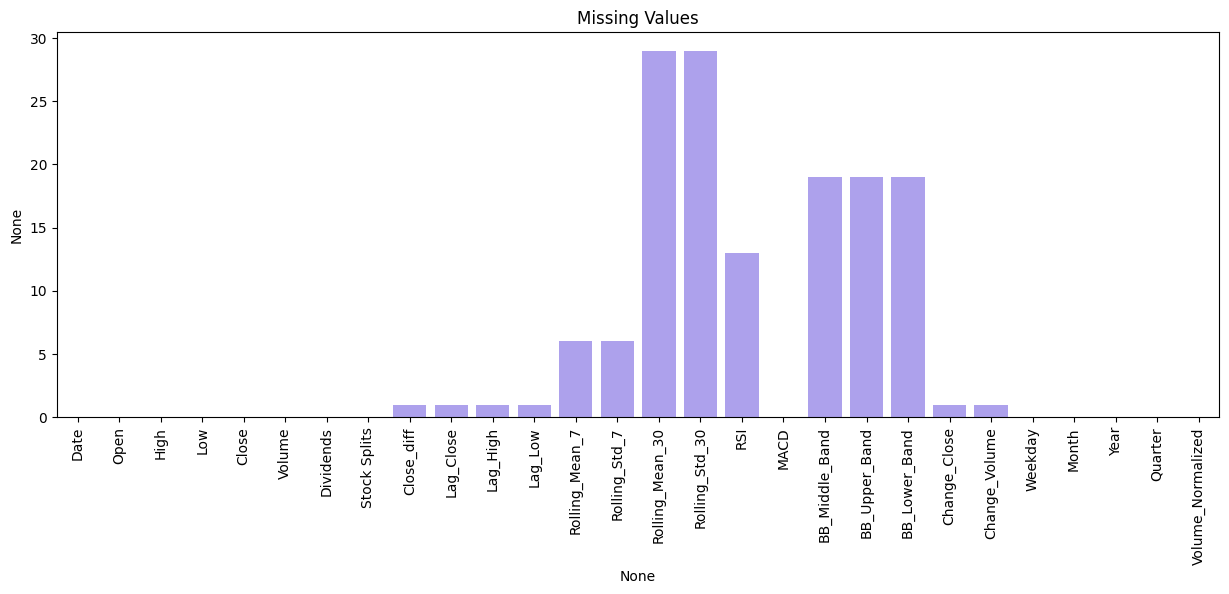

In [14]:
plt.figure(figsize=(15, 5))       
sns.barplot(x=df.columns, y=df.isnull().sum(), color=color1)
plt.xticks(rotation=90)
plt.title('Missing Values')
plt.show()

In [15]:
low_miss_val_features = ['Close_diff', 'Lag_Close', 'Lag_High' , 'Lag_Low' , 'Rolling_Mean_7' ,
                          'Rolling_Std_7', 'Change_Close', 'Change_Volume']

for features in low_miss_val_features:
    df[features] = df[features].fillna(method='ffill')

In [16]:
# RSI & Bollinger Bands rely on past data, leaving early gaps. Solutions is ffill  or  linear interpolation
moderate_miss_val_features = ['RSI', 'BB_Middle_Band', 'BB_Upper_Band', 'BB_Lower_Band']

for features in moderate_miss_val_features:
    df[features] = df[features].interpolate(method='linear')


Rolling_Mean_30 Rolling_Std_30
These columns use a 30-day rolling window, so the first 29 rows are naturally missing because there's not enough past data.
i will Keep the missing values as they are becuase they will not impact later calculations.

## Visule **EDA**(Chart Based Analysis)

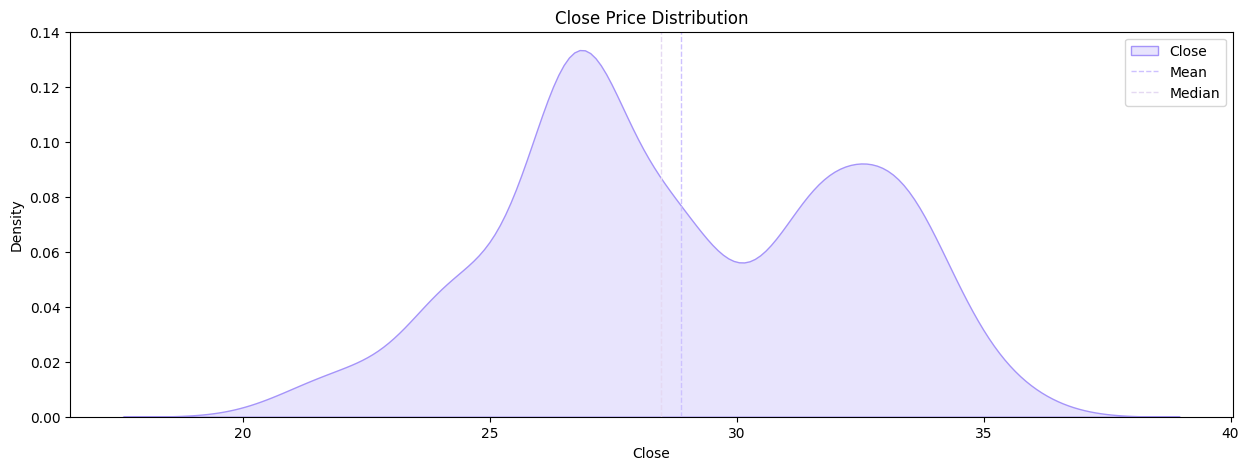

In [17]:
plt.figure(figsize=(15, 5))
sns.kdeplot(df['Close'], color=color1, shade=True, label='Close')
plt.axvline(df['Close'].mean(), color=color2, linestyle='dashed', linewidth=1, label='Mean', zorder=1)
plt.axvline(df['Close'].median(), color=color3, linestyle='dashed', linewidth=1, label='Median', zorder=1)
plt.legend()
plt.title('Close Price Distribution')
plt.show()

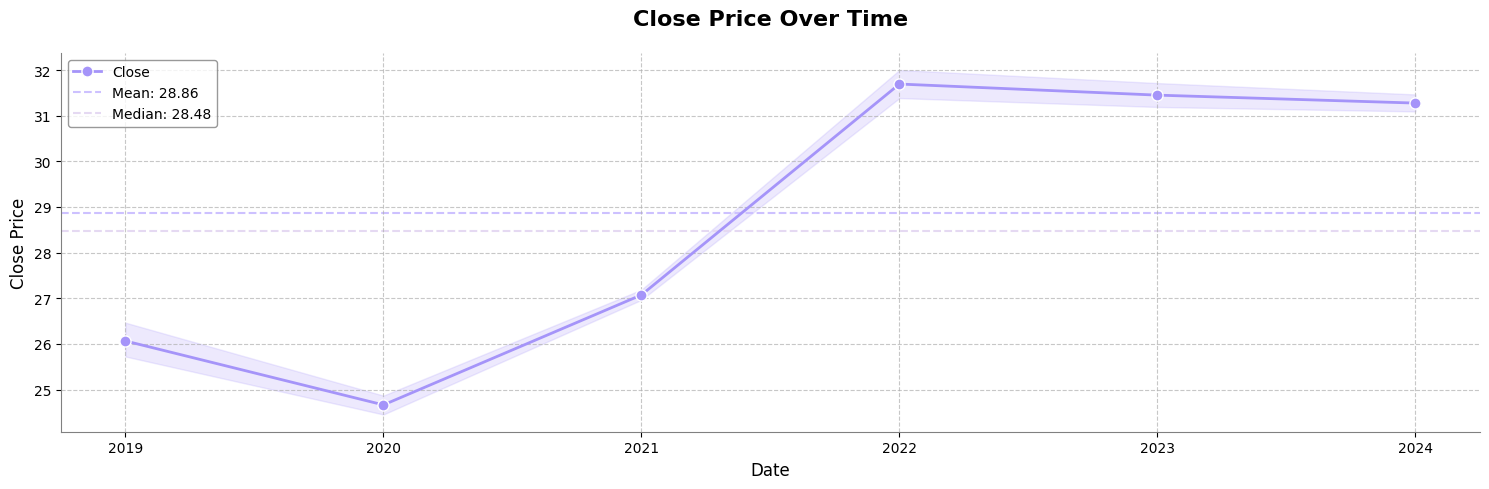

In [18]:
plt.figure(figsize=(15, 5))
# Line plot for Close over Year
sns.lineplot(x='Year', y='Close', data=df, color=color1, linewidth=2, label='Close',  marker='o',markersize=8,markeredgecolor='white', 
             markeredgewidth=1 ) 
# Mean line
plt.axhline(df['Close'].mean(), color=color2, linestyle='--', linewidth=1.5, label=f'Mean: {df["Close"].mean():.2f}', zorder=1)
# median line
plt.axhline(df['Close'].median(), color=color3, linestyle='--', linewidth=1.5, label=f'Median: {df["Close"].median():.2f}', zorder=1)
plt.title('Close Price Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='gray')
plt.grid(True, linestyle='--', alpha=0.7, zorder=0)
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('gray')
plt.gca().spines['bottom'].set_color('gray')


plt.tight_layout()
plt.show()

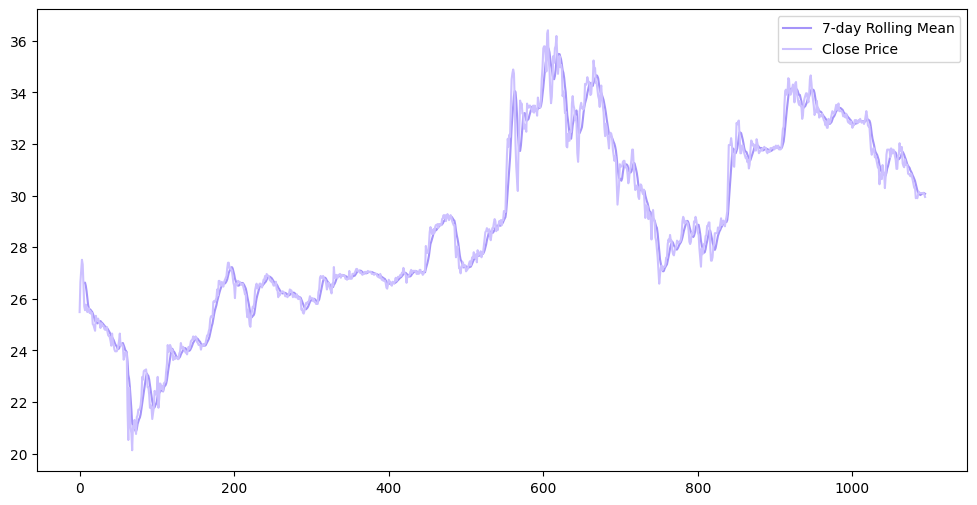

In [19]:
df['Close'].rolling(window=7).mean().plot(figsize=(12, 6), label='7-day Rolling Mean', color=color1)
df['Close'].plot(label='Close Price', color=color2)  
plt.legend()  
plt.show()  

<Figure size 1500x500 with 0 Axes>

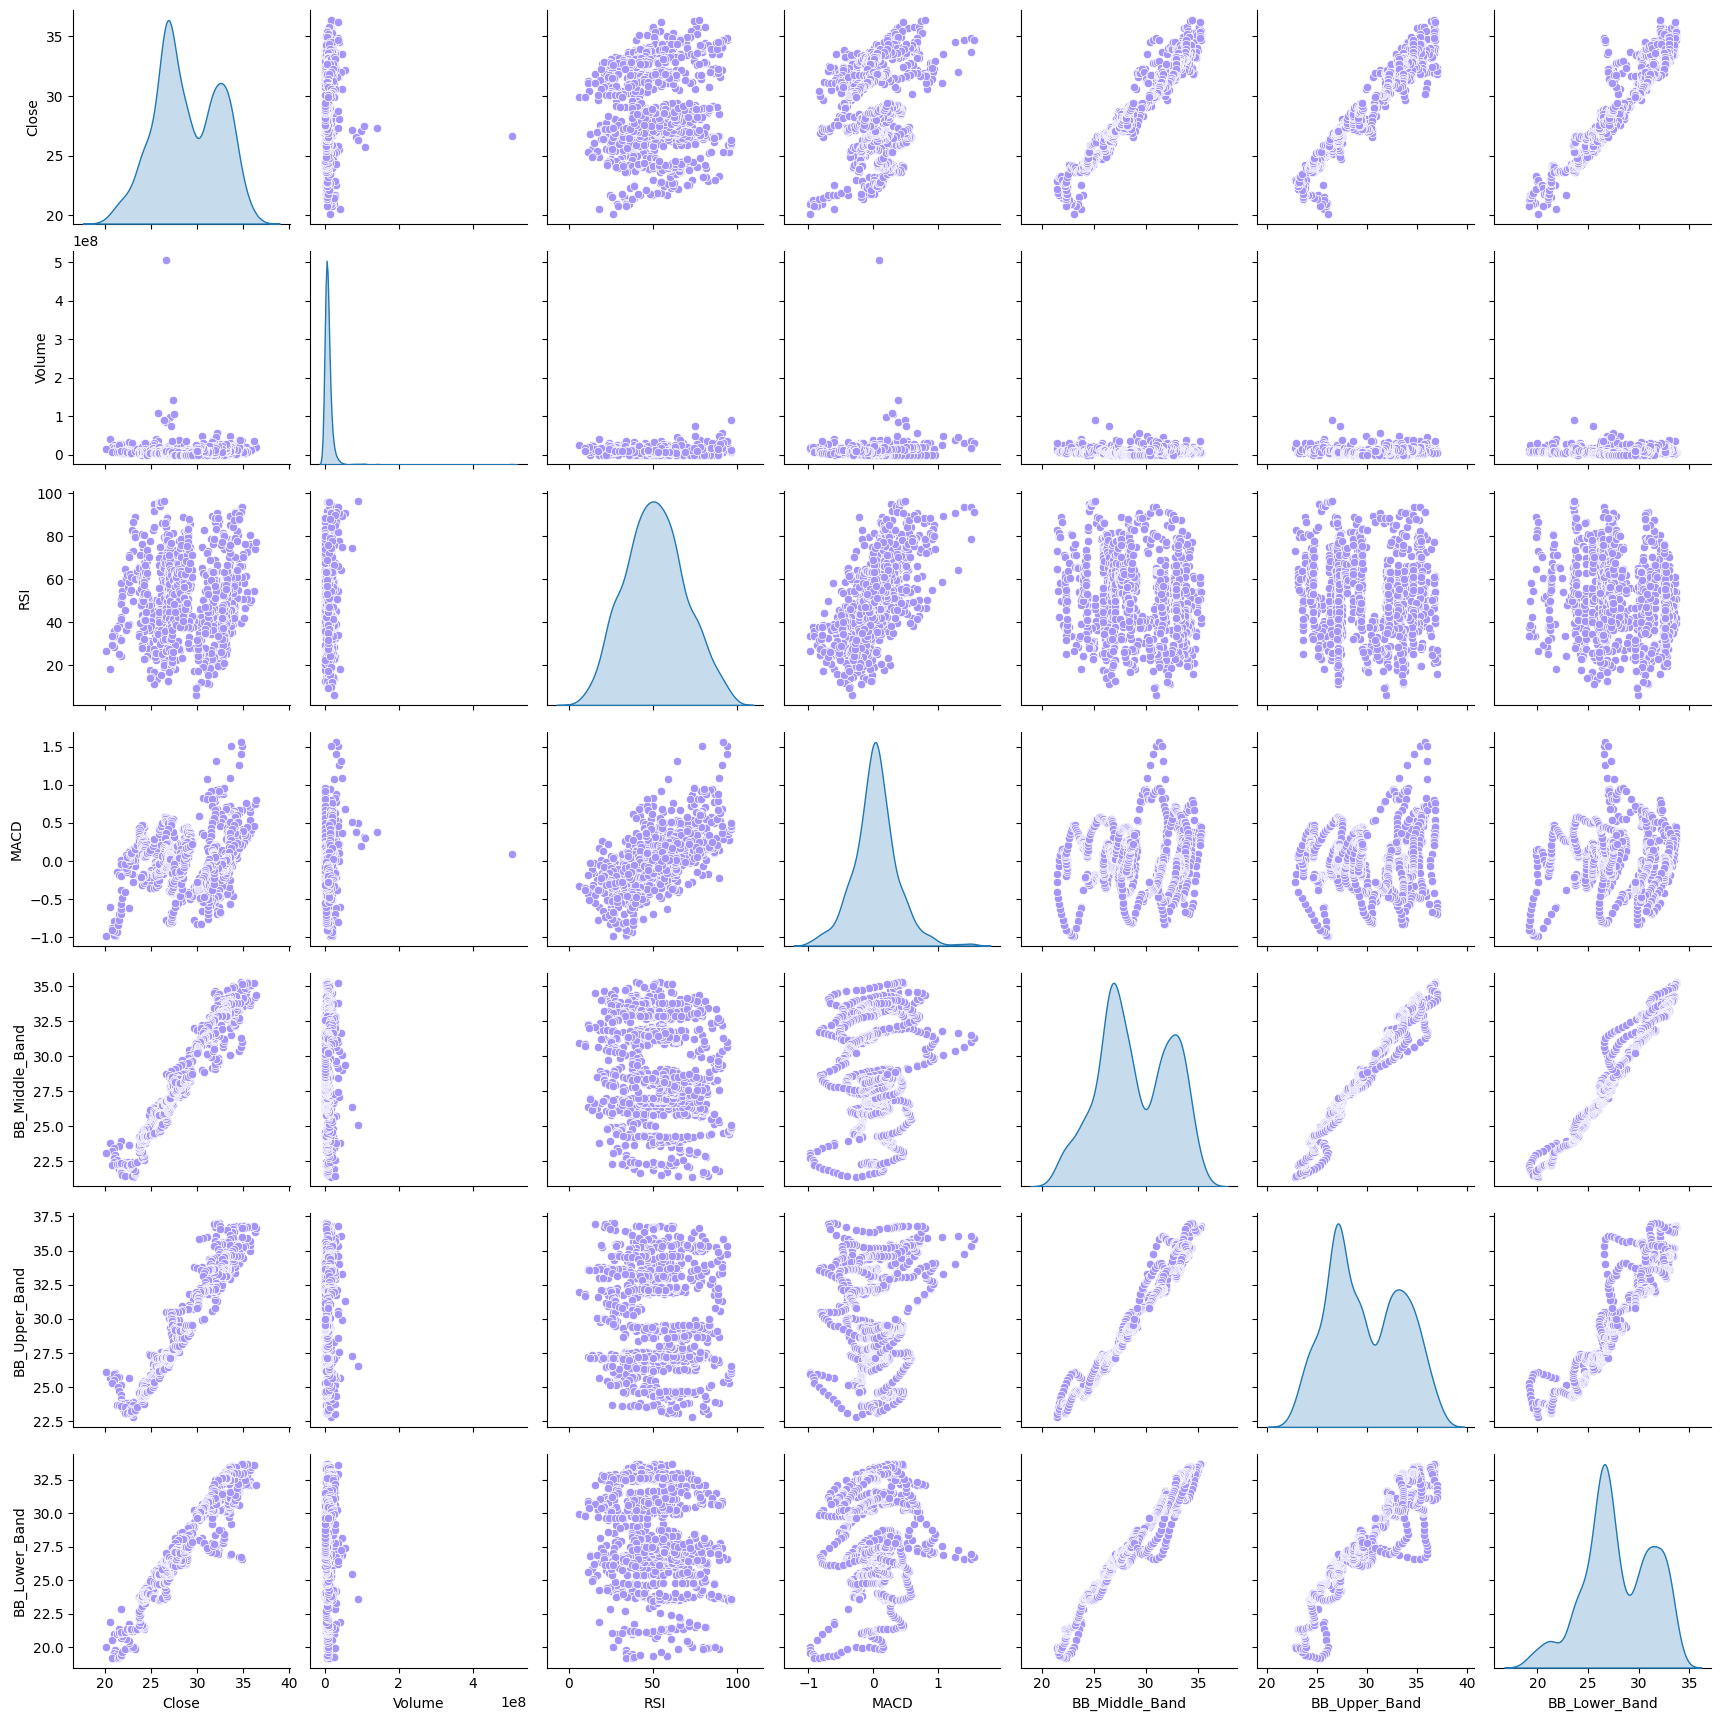

In [20]:
plt.figure(figsize=(15, 5))
sns.pairplot(df[['Close', 'Volume', 'RSI', 'MACD', 'BB_Middle_Band', 'BB_Upper_Band', 'BB_Lower_Band']], diag_kind='kde', plot_kws={'color': color1, 'edgecolor': 'white', 'linewidth': 0.5})  
plt.show() 

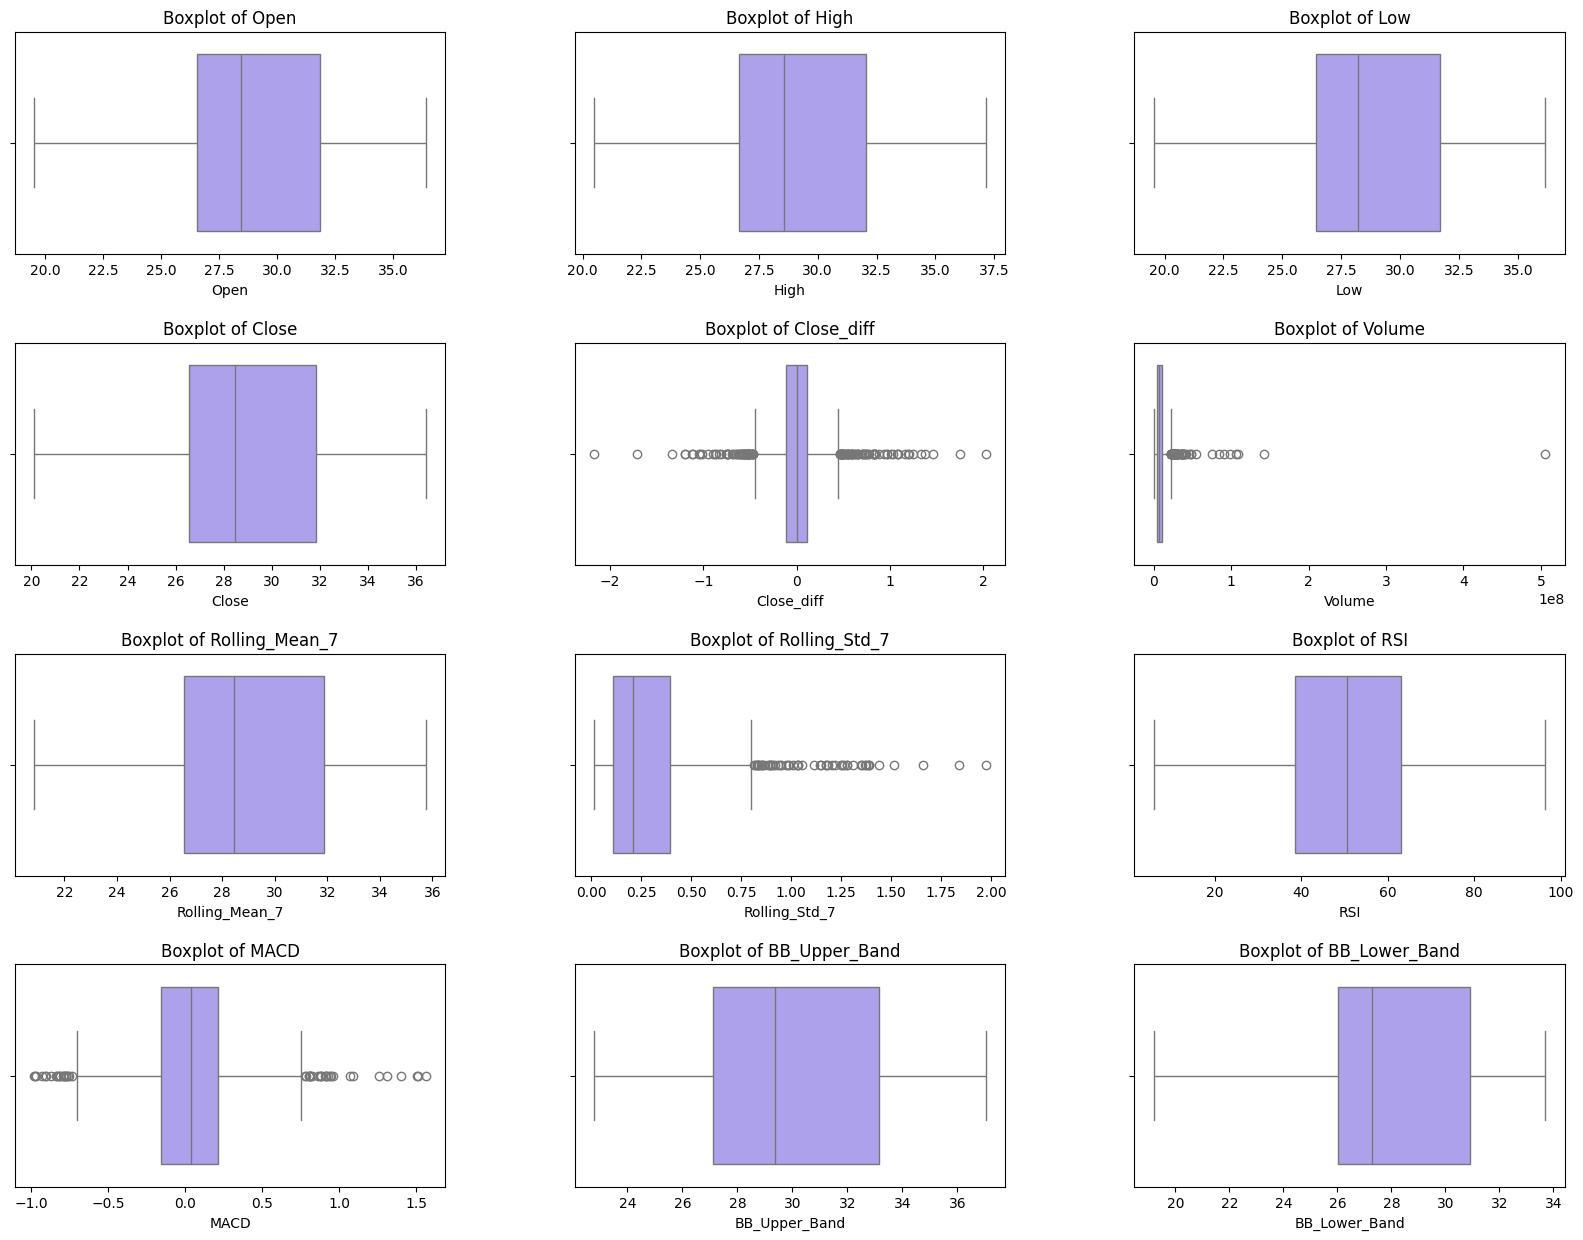

In [21]:
features_to_check = ['Open', 'High', 'Low', 'Close', 'Close_diff', 'Volume',  
                     'Rolling_Mean_7', 'Rolling_Std_7', 'RSI', 'MACD', 'BB_Upper_Band', 'BB_Lower_Band']

fig , axes = plt.subplots(4, 3, figsize=(20, 15))
axes = axes.flatten() 
for i, feature in enumerate(features_to_check):
    sns.boxplot(x=df[feature], ax=axes[i], color=color1)
    axes[i].set_title(f'Boxplot of {feature}')

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.tight_layout
plt.show()

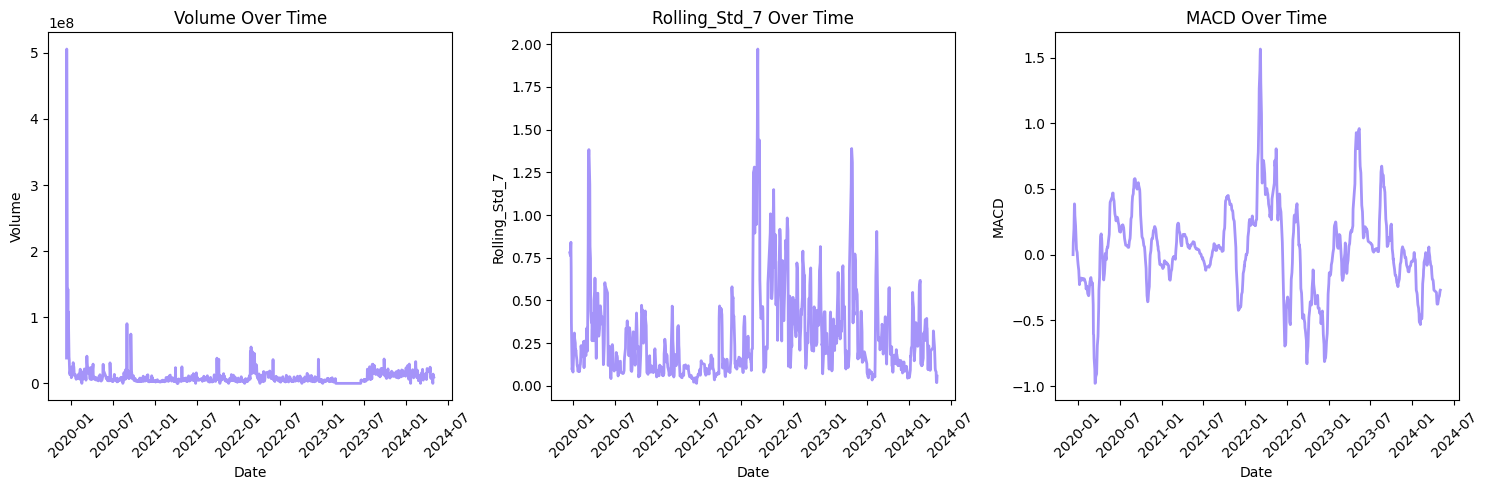

1      505692621
4      142672245
6      108120197
3      105973907
2       98349281
178     90226629
5       83822621
191     74552211
554     55009065
552     48049145
Name: Volume, dtype: int64

In [22]:

outliers_features = ['Volume', 'Rolling_Std_7', 'MACD']
# Create subplots for features that have outliers to check for patterns
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
for i, feature in enumerate(outliers_features):
    axes[i].plot(df['Date'], df[feature], color= color1, linewidth=2)  
    axes[i].set_title(f'{feature} Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='x', rotation=45)
    
plt.tight_layout()
plt.show()
df["Volume"].sort_values(ascending=False).head(10)

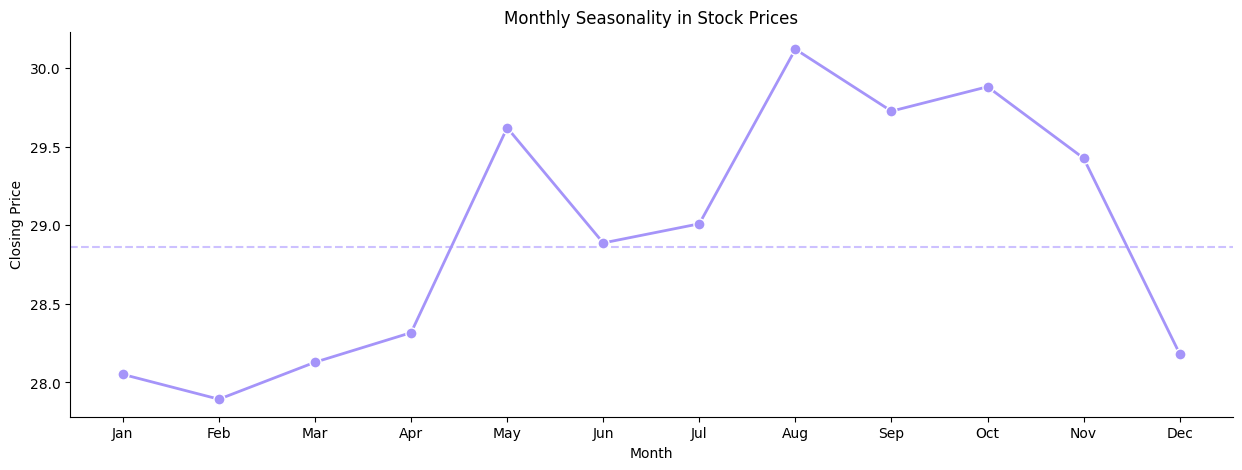

In [23]:
df['Month'] = df['Date'].dt.month
# Plot average close price per month
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="Month", y="Close", marker='o', markersize=8,markeredgecolor='white', linewidth=2, color=color1,
             markeredgewidth=1, ci=None)
# Mean line
plt.axhline(df['Close'].mean(), color=color2, linestyle='--', linewidth=1.5, label=f'Mean: {df["Close"].mean():.2f}', zorder=1)
sns.despine()
plt.xlabel("Month")
plt.ylabel("Closing Price")
plt.title("Monthly Seasonality in Stock Prices")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
plot_acf(df['Close'].dropna(), lags=30)
plt.title("ACF of Close Prices")
plot_pacf(df['Close'].dropna(), lags=30)
plt.title("PACF of Close Prices")

plot_acf(df['Close_diff'].dropna(), lags=30)
plt.title("ACF of Differenced Close Prices")
plot_pacf(df['Close_diff'].dropna(), lags=30)
plt.title("PACF of Differenced Close Prices")
plt.show()

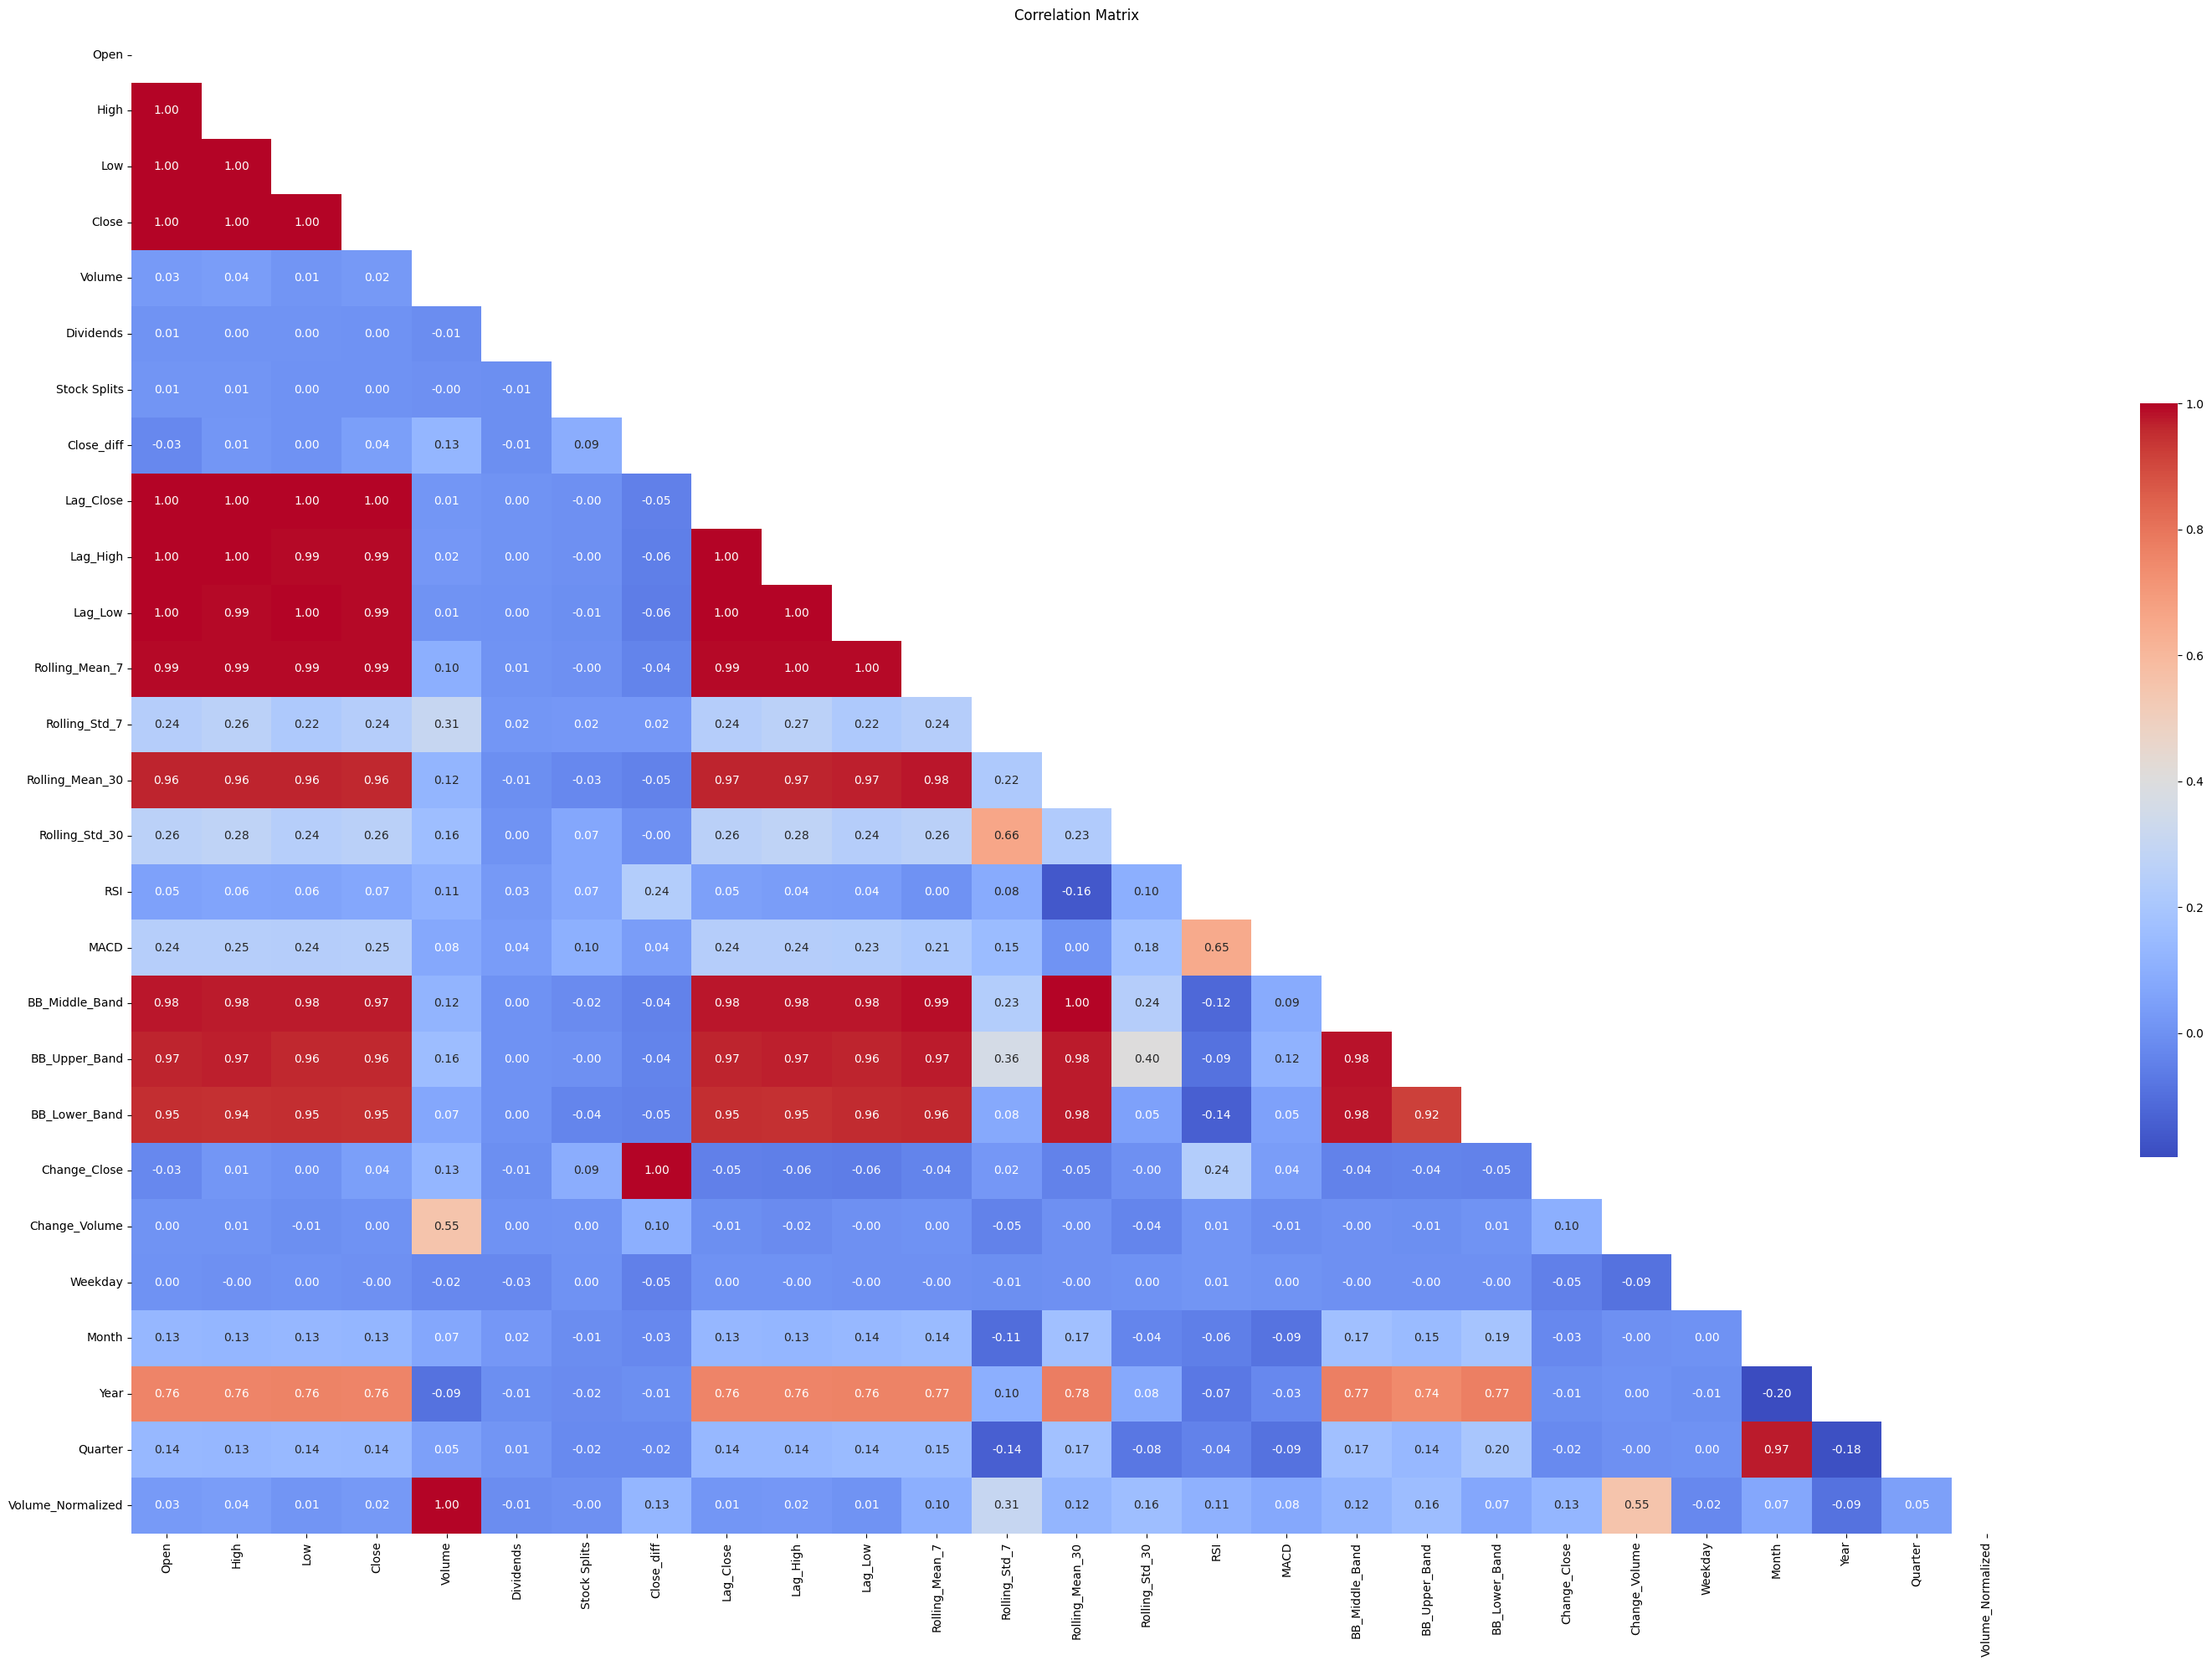

In [24]:
plt.figure(figsize=(30, 20))

# Generate the heatmap with adjustments
sns.heatmap(
    data=df.select_dtypes(include=['number']).corr(), mask = np.triu(np.ones_like(df.select_dtypes(include=['number']).corr(), dtype=bool)) , 
    cmap='coolwarm', 
    annot=True,              # Keep annotations
    fmt='.2f',              # Format annotations to 2 decimal places (optional for readability)
    square=False,           # Allow non-square cells to stretch with figure size
    annot_kws={"size": 10},  # Reduce annotation font size if it's too cramped
    cbar_kws={'shrink': 0.5} # Shrink the colorbar if needed

)
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

## Data Preprocessing

#### outlier removel 

In [25]:
df = df.drop(index=df['Volume'].idxmax())

In [47]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_diff,Lag_Close,...,BB_Middle_Band,BB_Upper_Band,BB_Lower_Band,Change_Close,Change_Volume,Weekday,Month,Year,Quarter,Volume_Normalized
0,2019-12-11 00:00:00+03:00,25.485229,25.485229,25.485229,25.485229,38289394,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,12,2019,4,1.580604
2,2019-12-15 00:00:00+03:00,26.860858,27.150462,26.643654,27.078060,98349281,0.0,0.0,0.434408,26.643652,...,NaN,NaN,NaN,0.434408,-407343340.0,6,12,2019,4,4.865806
3,2019-12-16 00:00:00+03:00,27.150464,27.584871,27.150464,27.512470,105973907,0.0,0.0,0.434410,27.078060,...,NaN,NaN,NaN,0.434410,7624626.0,0,12,2019,4,5.282864
4,2019-12-17 00:00:00+03:00,27.548665,27.621067,27.150460,27.331463,142672245,0.0,0.0,-0.181007,27.512470,...,NaN,NaN,NaN,-0.181007,36698338.0,1,12,2019,4,7.290218
5,2019-12-18 00:00:00+03:00,27.150463,27.222865,26.571253,26.571253,83822621,0.0,0.0,-0.760210,27.331463,...,NaN,NaN,NaN,-0.760210,-58849624.0,2,12,2019,4,4.071216


#### Normalize or Scale Features

In [ ]:
df_scaled = df.copy()
scaler = MinMaxScaler()
df_scaled[['Close', 'Volume']] = scaler.fit_transform(df_scaled[['Close', 'Volume']])

#### Feature Selection